# Лабораторная работа №4 (Ким Д.В., группа БПМ-151)

### Вариант 13

Найти с точностью $\varepsilon = 10^{-6}$ все корни системы нелинейных уравнений <br/>
$\begin{equation}
\begin{cases}
f_1(x_1,x_2) = 0 
\\
f_2(x_1,x_2) = 0
\end{cases}
\end{equation}$ <br/>
используя метод Ньютона для системы нелинейных уравнений. <br/> Найти корни с помощью встроенного блока решения уравнений *numpy*.

## Метод Ньютона для решения систем нелинейных уравнений

### Теория

Предположим, что исходя из начального приближения $x^{(0)}$ к решению $\bar{x}$ построены приближения $x^{(1)}, x^{(2)}, \ldots, x^{(n)}$. Заменим в системе

$\begin{equation*}
\begin{cases}
f_1(x_1, x_2, \ldots, x_m) = 0,\\
f_2(x_1, x_2, \ldots, x_m) = 0,\\
\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \qquad \qquad \qquad \qquad (1)\\
f_m(x_1, x_2, \ldots, x_m) = 0.\\
\end{cases}
\end{equation*}$

каждую из функций $f_i \quad  (i = 1, 2, \ldots, m)$ главной линейной частью её разложения по формуле Тейлора в точке $x^{(n)}$:

$f_i(x) \approx f_i(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_i(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}).$

В результате придем к системе линейных алгебраических уравнений:

$f_1(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_1(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}) = 0,$

$f_2(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_2(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}) = 0,$

$\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots$$

$f_m(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_m(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}) = 0,$

имеющей в матричной форме записи следующий вид:

$$f(x^{(n)})+f^\prime(x^{(n)})(x-x^{(n)})=0; \qquad (2)$$

здесь $f^\prime$ - матрица Якоби:

$f^\prime(x) = \begin{pmatrix}
{\partial f_1 (x) \over \partial x_1} & {\partial f_1 (x) \over \partial x_2} & \cdots & {\partial f_1 (x) \over \partial x_n} \\
{\partial f_2 (x) \over \partial x_1} & {\partial f_2 (x) \over \partial x_2} & \cdots & {\partial f_2 (x) \over \partial x_n} \\
\cdots & \cdots & \cdots &\cdots \\
{\partial f_m (x) \over \partial x_1} & {\partial f_m (x) \over \partial x_2} & \cdots & {\partial f_m (x) \over \partial x_n}
\end{pmatrix}.$

Предположим, что матрица $f^\prime(x^{(n)})$ невырожденная, т.е. существует обратная матрица $(f^\prime(x^{(n)}))^{-1}$. Тогда система $(2)$ имеет единственное решение, которое и принимется за очередное приближение $x^{(n+1)}$ к решению $\bar{x}$.Таким образом, приближение $x^{(n+1)}$ удовлетворяет равенству

$f(x^{(n)})+f^\prime(x^{(n)})(x^{(n+1)}-x^{(n)})=0, \qquad (3)$

выражая из которого $x^{(n+1)}$, выводим итерационную формулу  метода Ньютона:

$x^{(n+1)} = x^{(n)}-(f^\prime(x^{(n)}))^{-1} f(x^{(n)}).$

#### Замечание.

Последняя формула предполагает использование трудоемкой операции обращения матрицы, поэтому непосредственное её использование для вычисления $x^{(n+1)}$ в большинстве случаев нецелесообразно. Обычно вместо этого решают эквивалентую системе (3) систему линейных алгебраических уравнений:

$f^\prime(x^{(n)}) \Delta x^{(n+1)} = - f(x^{(n)})$

относительно поправки $\Delta x^{(n+1)} = x^{(n+1)} - x^{(n)}$. Затем полагают

$x^{(n+1)} = x^{(n)} + \Delta x^{(n+1)}.$


### Сходимость метода

#### Основная теорема о сходимости метода Ньютона

Пусть в некоторой окрестности $\bar{x}$ системы $(1)$ функции $f_i \quad (i = 1, 2, \ldots, m)$ дважды непрерывно дифференцируемы и матрица $f^\prime(\bar{x})$ невырождена. Тогда найдется такая маоая $\delta$-окрестность решения $\bar{x}$, что при произвольном выборе начального приближения $x^{(0)}$ из этой окрестности итерационная последовательность метода Ньютона не выходит за пределы оксретности и справедлива оценка:

$\Vert x^{(n+1)} - \bar{x} \Vert \le \cfrac{1}{\delta} \Vert x^{(n)} - \bar{x}\Vert^2, n \ge 0.$

Эта оценка означает, что метод сходится с квадратичной скоростью.

Квадратичная скорость сходимости метода Ньютона позволяет использовать простой практический критерий окончания итераций

$\Vert x^{(n)} - x^{(n-1)}\Vert < \varepsilon.$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from scipy.optimize import fsolve
from scipy.misc import derivative
from numpy import linalg as lnl

Система уравнений, с которой будем работать: <br/>
$\begin{equation}
\begin{cases}
\tan(x_1 x_2+0.4)-x_{1}^{2}=0
\\
0.6 x_{1}^{2}+2x_{2}^{2}-1=0
\end{cases}
\end{equation}$

In [34]:
def eqs(x):
    x1, x2 = x[0], x[1]
    return np.array([np.tan(x1*x2+0.4)-x1**2, 0.6*x1**2+2*x2**2-1])

#### Локализуем корни системы уравнений
Приведём уравнения к виду: <br/>
$\begin{equation}
\begin{cases}
x_2 = \frac{\arctan{x_{1}^{2}-0.4}}{x_1}
\\ 
x_2 = \sqrt{\frac{1-0.6x_{1}^{2}}{2}}
\end{cases}
\end{equation}$
и изобразим графически.

In [35]:
def g1(x1):
    return (np.arctan(x1**2)-0.4)/x1 
def g2(x1):
    return np.sqrt((1-0.6*x1**2)/2)

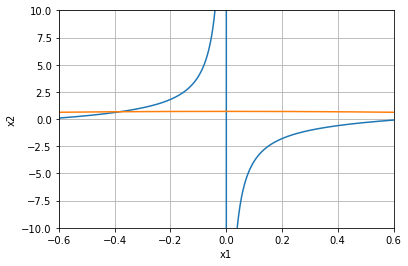

In [36]:
X = np.arange(-np.sqrt(1/2), np.sqrt(1/2), 1e-3)
Y1 = g1(X)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X, Y1)
Y2 = g2(X)
plt.plot(X, Y2)
plt.grid(True)
plt.axis([-0.6, 0.6, -10, 10])
plt.show()

Видим, что решение системы локализовано в прямоугольнике $[-0.4,-0.2]\times[0,2.5]$

Определим вспомогательные функции *partial_derivative* и *Jacobian*: нам понадобятся частные производные и якобиан в методе Ньютона.

In [37]:
def partial_derivative(fun, f_num=0, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x 
        return fun(args)[f_num]
    return derivative(wraps, point[var], dx = 1e-6)

def Jacobian(f, x, n=2):
    jacob = np.zeros((2, 2))
    for i in range(n):
        for j in range(n):
            jacob[i, j] = partial_derivative(f, i, j, x)
    return jacob

In [38]:
def nonlin_newton(F, J, x, norm, eps):
    # F - система уравнений
    # J - функция для подсчета якобиана
    # x - начальное приближение
    # norm - используемый тип нормы
    # eps - точность вычислений
    count = 0
    itp = np.array(x)
    while np.abs(lnl.norm(F(x), ord=norm)) >= eps:
        delta = lnl.solve(J(F, x), -F(x))
        x = x + delta
        itp = np.vstack((itp, x))
        count += 1 # число итераций
    return x, count, itp

In [39]:
x_2, n_2, itp_2 = nonlin_newton(eqs, Jacobian, x=[-0.2, 2.5], norm=2, eps=1e-6)

In [40]:
print('2-норма, Корни - [{:.7e}, {:.7e}], Число итераций - {:d}'.format(x_2[0], x_2[1], n_2))

2-норма, Корни - [-3.7984840e-01, 6.7580667e-01], Число итераций - 5


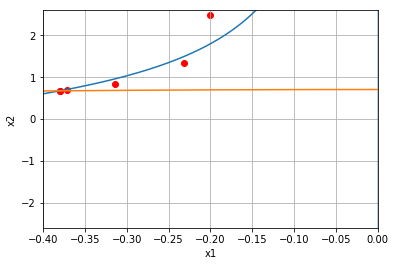

In [41]:
X = np.arange(-np.sqrt(1/2), np.sqrt(1/2), 1e-3)
Y1 = g1(X)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X, Y1)
plt.scatter(itp_2[:,0], itp_2[:,1], c='r')
Y2 = g2(X)
plt.plot(X, Y2)
plt.grid(True)
plt.axis([-0.4, 0.0, -2.6, 2.6])
plt.show()

In [42]:
x_inf, n_inf, itp_inf = nonlin_newton(eqs, Jacobian, x=[-0.2, 2.5], norm=np.inf, eps=1e-6)

In [43]:
print('inf-норма, Корни - [{:.7e}, {:.7e}], Число итераций - {:d}'.format(x_inf[0], x_inf[1], n_inf))

inf-норма, Корни - [-3.7984840e-01, 6.7580667e-01], Число итераций - 5


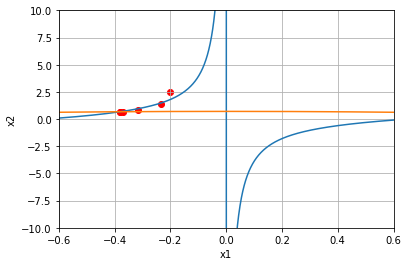

In [44]:
X = np.arange(-np.sqrt(1/2), np.sqrt(1/2), 1e-3)
Y1 = g1(X)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X, Y1)
plt.scatter(itp_inf[:,0], itp_inf[:,1], c='r')
Y2 = g2(X)
plt.plot(X, Y2)
plt.grid(True)
plt.axis([-0.6, 0.6, -10, 10])
plt.show()

In [45]:
x, y = fsolve(eqs, [-0.2, 0])

print('Корни - [{:.7e}, {:.7e}]'.format(x, y))
print('Норма ошибки с 2-нормой:', lnl.norm([x, y] - x_2, ord=np.inf))
print('Норма ошибки с inf-нормой:', lnl.norm([x, y] - x_inf, ord=2))

Корни - [-3.7984844e-01, 6.7580659e-01]
Норма ошибки с 2-нормой: 8.39069755897981e-08
Норма ошибки с inf-нормой: 9.296768525065065e-08


Ошибка меньше $\varepsilon=10^{-6}$. <br/>
Все классно.